In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load Datasets

In [4]:
DATA_FOLDER = 'data/wikispeedia_paths-and-graph/'

ARTICLES_DATASET = DATA_FOLDER+"articles.tsv"
LINKS_DATASET = DATA_FOLDER+"links.tsv"
CATEGORIES_DATASET = DATA_FOLDER+"categories.tsv"
PATHS_FINISHED_DATASET = DATA_FOLDER+"paths_finished.tsv"
PATHS_UNFINISHED_DATASET = DATA_FOLDER+"paths_unfinished.tsv"

In [5]:
categories = pd.read_csv(CATEGORIES_DATASET, sep='\t', header=11, names = ["Name", "Category"])
articles = pd.read_csv(ARTICLES_DATASET, sep='\t', header=10, names = ["Name"])
links = pd.read_csv(LINKS_DATASET, header=10,sep='\t', names=["Outgoing", "Incoming"])
paths = pd.read_csv(PATHS_FINISHED_DATASET, header=15,sep='\t', names=["ip", "timestampe", "duration", "path", "rating"])

Start with Categories Dataset, as it needs some postprocessing for the hierarchical category

In [6]:


split= categories['Category'].str.split(".", expand=True)
categories = pd.concat([categories["Name"], split], axis=1)

# Check if all values in 0 are subject, then discard column 
if (categories[0] == categories[0][0]).all():
    categories = categories.drop(columns=0)

categories.columns = ["Name", "Subject", "SubCat1", "SubCat2"]
categories.head(5)

,Name,Subject,SubCat1,SubCat2
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,History,British_History,British_History_1500_and_before_including_Roma...
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,People,Historical_figures,None
2,%C3%85land,Countries,None,None
3,%C3%85land,Geography,European_Geography,European_Countries
4,%C3%89douard_Manet,People,Artists,None


In [7]:
# test= categories.groupby(["Subject", "SubCat1"]).count()
# test.head(100)

multi_cat = categories.set_index(['Subject', 'SubCat1', 'SubCat2']).sort_index()


In [8]:
categories.groupby("Subject").count().sort_values(by = "Name", ascending=False)

,Name,SubCat1,SubCat2
Subject,,,
Science,1122,1122,1122
Geography,1084,1084,216
People,689,689,0
History,545,545,144
Everyday_life,374,374,0
Design_and_Technology,254,254,0
Countries,229,0,0
Citizenship,224,224,0
Language_and_literature,196,196,0


Load articles dataset as well


In [9]:

nr_articles = len(articles)
print("Nr of available articles:", nr_articles)

Nr of available articles: 4604


Some articles have multiple categories

In [10]:
print(f"Number of articles: {nr_articles}, vs Number of names in categories: {len(categories)}")

Number of articles: 4604, vs Number of names in categories: 5204


Articles that do not have an outgoing or incoming link

In [11]:
no_outgoing= list(set(articles.Name.tolist())-set(links.Outgoing.tolist()))
nr_no_out = len(no_outgoing)
no_incoming= list(set(articles.Name.tolist())-set(links.Incoming.tolist()))
nr_no_in = len(no_incoming)
print(f"There are {nr_no_out} articles that have no link outgoing, and {nr_no_in} articles that have no link pointing towards them")

There are 17 articles that have no link outgoing, and 469 articles that have no link pointing towards them


In [12]:
isolated_articles = list(set(no_outgoing) & set(no_incoming))
print("The following articles are completly isolated with no hyperlinks connecting them: ", isolated_articles)

The following articles are completly isolated with no hyperlinks connecting them:  ['Donation', 'Wowpurchase', 'Wikipedia_Text_of_the_GNU_Free_Documentation_License', 'Private_Peaceful', 'Vacutainer', 'Underground_%28stories%29', 'Lone_Wolf_%28gamebooks%29', 'Schatzki_ring', 'Badugi', 'Color_Graphics_Adapter', 'Suikinkutsu', 'Douglas_DC-4']


In [13]:
summary = pd.DataFrame(index = articles.Name.tolist())
summary = pd.concat([summary, links.Incoming.value_counts(), links.Outgoing.value_counts()], axis=1)
summary = summary.reset_index().rename(columns={"index":"Name"})

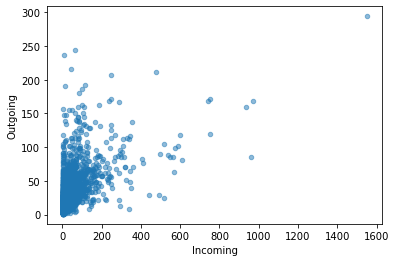

In [14]:
# Scatter plot
ax = summary.plot.scatter(x='Incoming', y='Outgoing', alpha=0.5)

In [15]:
len(paths.ip.unique())


14245

In [16]:
len(paths.ip.unique())/len(paths)

0.2775883235574956